In [44]:
%pylab inline
from io import StringIO
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [153]:
co_csv = !cat ../data/all/B4.csv | test_model ../models/co.pkl --out_column co-pred 2>/dev/null
no2_csv = !cat ../data/all/B4.csv | test_model ../models/no2.pkl --out_column no2-pred 2>/dev/null
o3_csv = !cat ../data/all/B4.csv | test_model ../models/o3.pkl --out_column o3-pred 2>/dev/null
co_df = pd.read_csv(StringIO(co_csv.n), index_col='time')
co_df.index = pd.to_datetime(co_df.index)
no2_df = pd.read_csv(StringIO(no2_csv.n), index_col='time')
no2_df.index = pd.to_datetime(no2_df.index)
o3_df = pd.read_csv(StringIO(o3_csv.n), index_col='time')
o3_df.index = pd.to_datetime(o3_df.index)
data = co_df.merge(o3_df, how='outer').merge(no2_df, how='outer')
data.index = co_df.index

In [96]:
data

,no2,o3,co,temperature,pressure,humidity,pt,nc,epa-co,epa-no2,epa-ozone,epa-temperature-F,epa-humidity,epa-pressure,co-pred,o3-pred,no2-pred
time,,,,,,,,,,,,,,,,,
2016-08-13 07:00:00,12.982124,-1.226891e+01,-83.968708,30.118056,1000.111111,42.291667,329.916101,248.738624,0.2,0.007,0.037,73.900000,0.660000,29.710000,0.174245,0.045049,0.012496
2016-08-13 08:00:00,5.575865,-1.739788e+01,-83.296249,27.783333,1000.001389,48.533333,328.181369,252.201273,0.2,0.008,0.034,73.000000,0.690000,29.720000,0.186136,0.036247,0.010652
2016-08-13 09:00:00,0.744597,-2.055722e+01,-82.010749,24.208333,1000.495833,59.644444,325.166521,255.920353,0.2,0.009,0.029,70.000000,0.760000,29.720000,0.192153,0.029648,0.008533
2016-08-13 10:00:00,5.312662,-1.219004e+01,-88.375700,21.537500,1001.165278,70.036111,322.338483,258.466742,0.2,0.009,0.029,68.000000,0.810000,29.750000,0.209647,0.021004,0.009283
2016-08-13 11:00:00,8.648354,-9.009390e+00,-79.902569,20.972222,1002.033333,74.273611,321.512156,259.026177,0.2,0.010,0.027,68.000000,0.810000,29.770000,0.168262,0.022299,0.008694
2016-08-13 12:00:00,11.085451,-5.026412e+00,-80.646819,20.000000,1002.086111,75.891667,321.025639,259.532399,0.2,0.009,0.030,68.000000,0.810000,29.770000,0.179369,0.018960,0.010779
2016-08-13 13:00:00,15.206410,-2.976523e+00,-81.375964,20.000000,1002.000000,72.637500,320.948119,259.643948,0.2,0.009,0.028,66.900000,0.840000,29.770000,0.194698,0.025709,0.013764
2016-08-13 14:00:00,10.303526,-8.759556e+00,-85.729700,20.000000,1002.001389,72.825000,320.950463,259.645988,0.2,0.011,0.022,66.900000,0.840000,29.760000,0.207879,0.026238,0.011623
2016-08-13 15:00:00,8.496440,-9.244596e+00,-92.733342,20.000000,1001.986111,75.779167,320.760700,259.820733,0.2,0.012,0.019,66.900000,0.810000,29.750000,0.219213,0.022331,0.009353


# Predictions

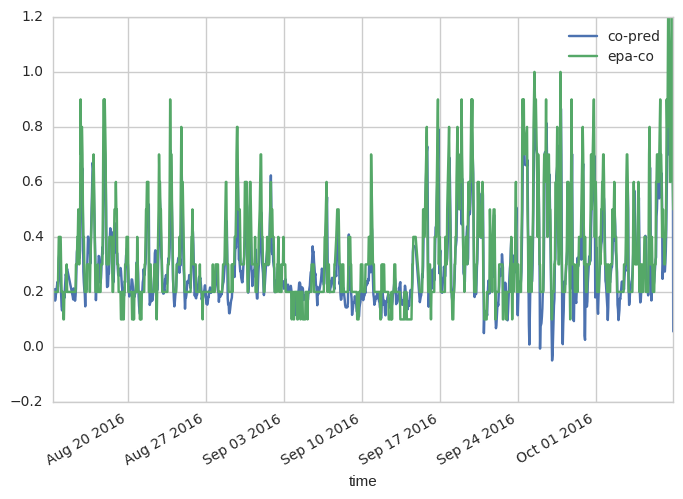

In [97]:
data.plot(y=["co-pred", "epa-co"]);

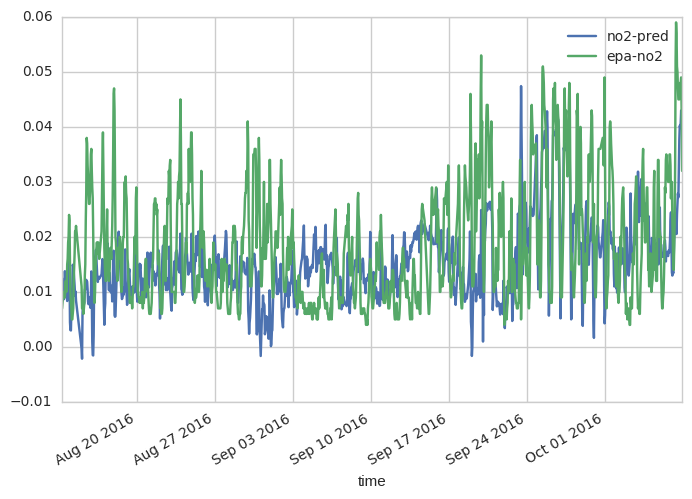

In [154]:
data.plot(y=["no2-pred", "epa-no2"]);

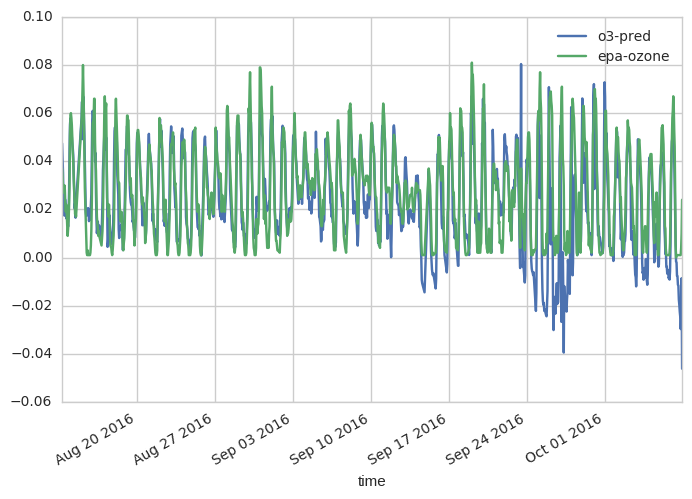

In [150]:
data.plot(y=["o3-pred", "epa-ozone"]);

# Errors

In [155]:
data["co_errors"] = (data['co-pred'] - data['epa-co'])**2
data["no2_errors"] = (data['no2-pred'] - data['epa-no2'])**2
data["o3_errors"] = (data['o3-pred'] - data['epa-ozone'])**2
weekly_error = data[["co_errors", "no2_errors", "o3_errors"]].groupby(pd.TimeGrouper('W')).mean()

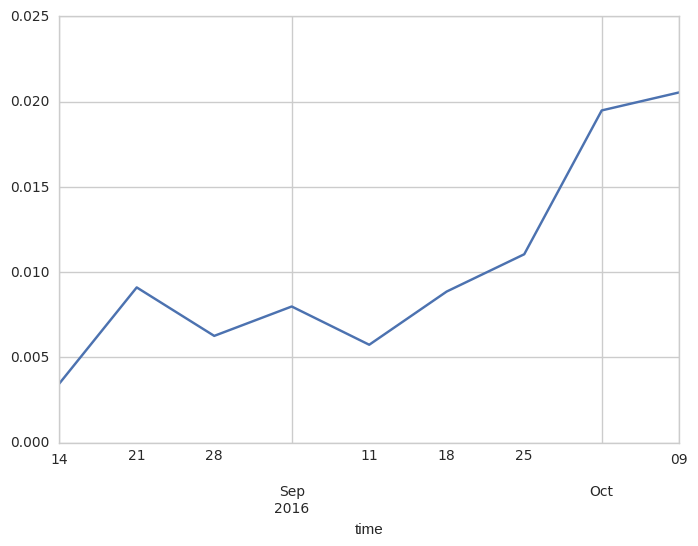

In [156]:
weekly_error["co_errors"].plot();

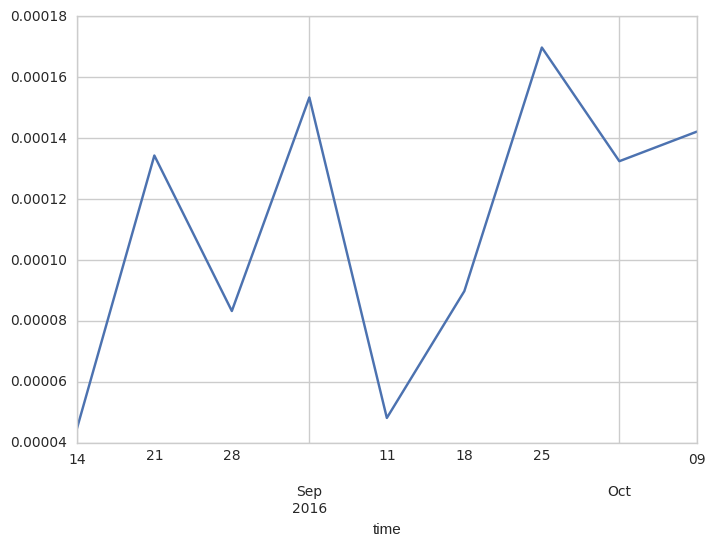

In [157]:
weekly_error["no2_errors"].plot();

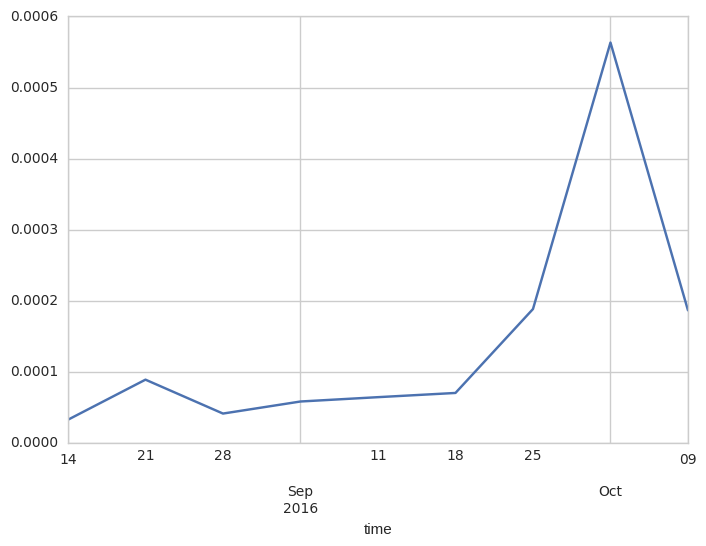

In [159]:
weekly_error["o3_errors"].plot();